In [ ]:
import pandas
df = pandas.read_csv(r'C:\Users\danil\Downloads\SPECT.csv')
print(df)

In [ ]:
print("Contraceptive method used: ", set(df['overall']))

In [ ]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22']]

In [ ]:
print(X)

In [ ]:
y = df['overall']

In [ ]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
print(train)

In [ ]:
X_train = train[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20','F21', 'F22']]

In [ ]:
y_train = train['overall']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
clf = LogisticRegression().fit(X, y)
#softmax_reg = LogisticRegression(multi_class="multinomial", max_iter=1000, solver="lbfgs", C=10)
#softmax_reg.fit(X_train, y_train)
#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=1)
#from sklearn.linear_model import SGDClassifier
#clf = SGDClassifier(random_state=42, loss="hinge", penalty="l2", max_iter=1000)
#clf =  SVC(gamma='auto')
#clf.fit(X_train, y_train) 

In [ ]:
clf.predict([X_train.iloc[0]])

In [ ]:
y_train.iloc[0]

In [ ]:
y_train

In [ ]:
X_test = test[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20','F21', 'F22']]

In [ ]:
y_test = test['overall']

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=3, scoring="precision")

In [ ]:
import pandas
df = pandas.read_csv(r'C:\Users\danil\Downloads\cmc.csv')
print(df)

In [ ]:
X = df[['Wife_age','Wife_education','Husband_education','Number_of_children_ever_born','Wife_religion','Wife_now_working?','Husband_occupation','Standard-of-living_index','Media_exposure']]

In [ ]:
y = df['Contraceptive_method_used']

In [ ]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))

In [1]:
import pandas
df = pandas.read_csv(r'C:\\machine.csv')
print(df)

        vendor            model  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP  \
0      adviser            32/60   125    256   6000   256     16    128   198   
1       amdahl           470v/7    29   8000  32000    32      8     32   269   
2       amdahl          470v/7a    29   8000  32000    32      8     32   220   
3       amdahl          470v/7b    29   8000  32000    32      8     32   172   
4       amdahl          470v/7c    29   8000  16000    32      8     16   132   
5       amdahl           470v/b    26   8000  32000    64      8     32   318   
6       amdahl         580-5840    23  16000  32000    64     16     32   367   
7       amdahl         580-5850    23  16000  32000    64     16     32   489   
8       amdahl         580-5860    23  16000  64000    64     16     32   636   
9       amdahl         580-5880    23  32000  64000   128     32     64  1144   
10      apollo            dn320   400   1000   3000     0      1      2    38   
11      apollo            dn

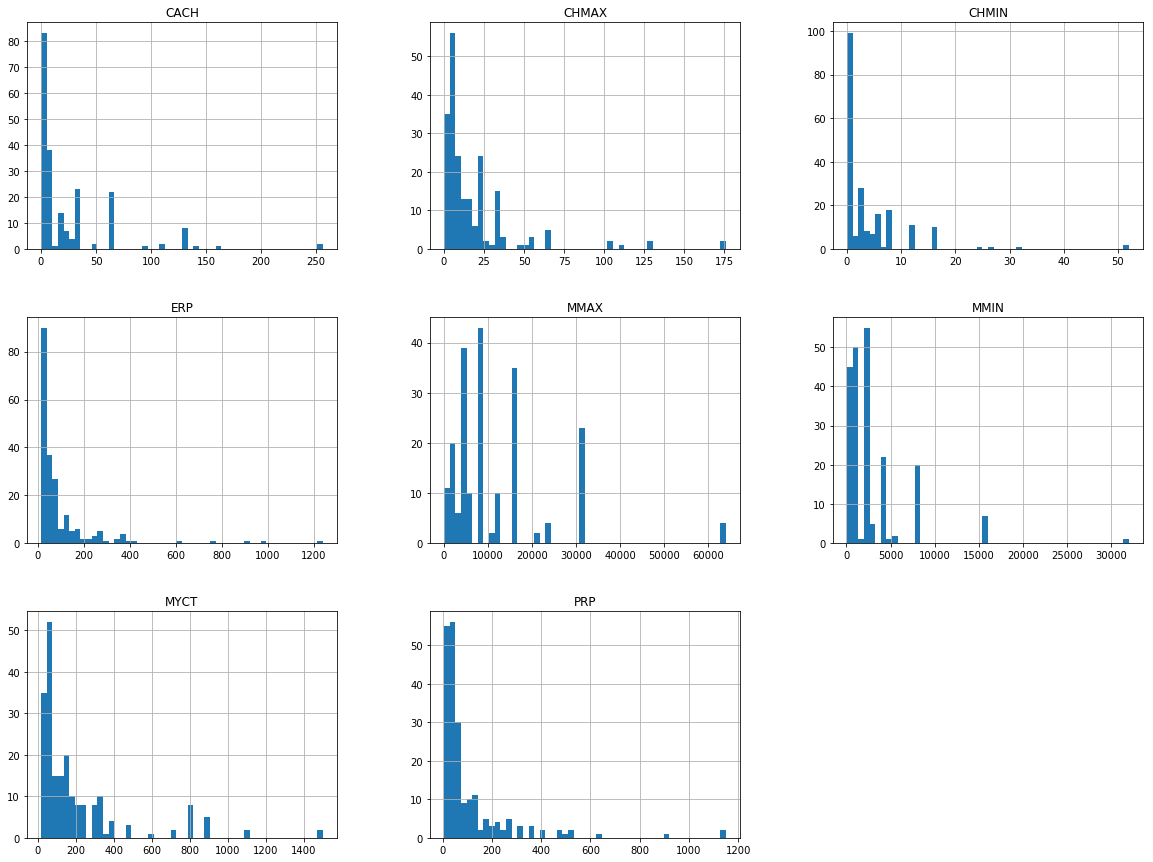

In [2]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290E9DFA3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000290EC689B00>]], dtype=object)

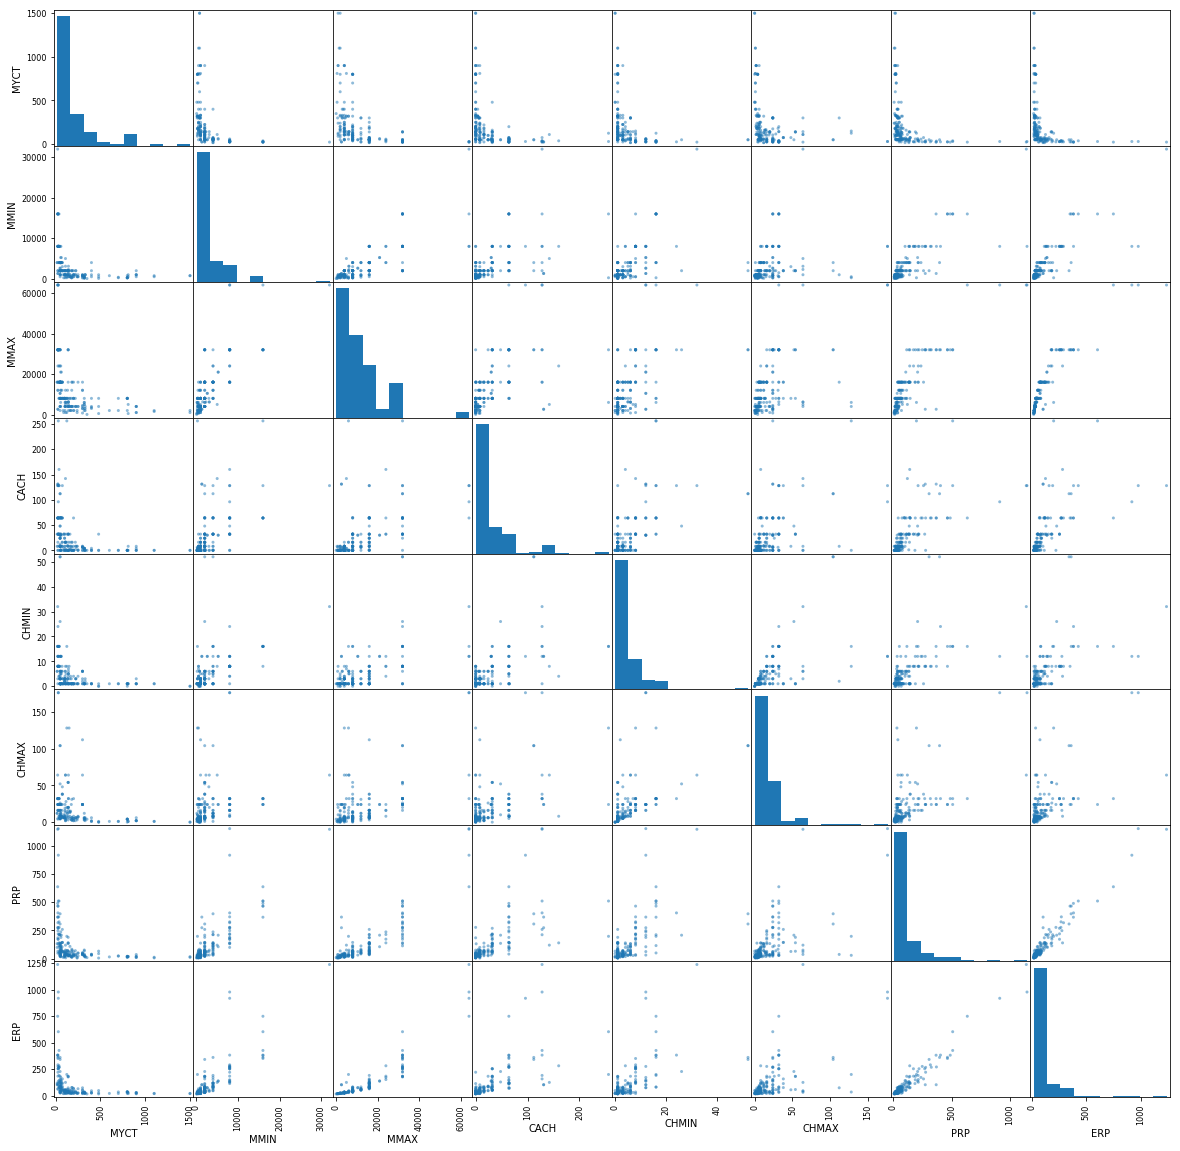

In [3]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print(df['vendor'])
enc = LabelEncoder()
enc.fit(df['vendor'])
df['vendor'] = enc.transform(df['vendor'])
print(df['vendor'])

train, test = train_test_split(df, test_size=0.2)

X_train = train[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_train = train['ERP']

X_test = test[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_test = test['ERP']

#from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train, norm = 'l2')
#X_test = preprocessing.normalize(X_test, norm = 'l2')
#print(X_train)



0        adviser
1         amdahl
2         amdahl
3         amdahl
4         amdahl
5         amdahl
6         amdahl
7         amdahl
8         amdahl
9         amdahl
10        apollo
11        apollo
12          basf
13          basf
14           bti
15           bti
16     burroughs
17     burroughs
18     burroughs
19     burroughs
20     burroughs
21     burroughs
22     burroughs
23     burroughs
24         c.r.d
25         c.r.d
26         c.r.d
27         c.r.d
28         c.r.d
29         c.r.d
         ...    
179        prime
180        prime
181      siemens
182      siemens
183      siemens
184      siemens
185      siemens
186      siemens
187      siemens
188      siemens
189      siemens
190      siemens
191      siemens
192      siemens
193       sperry
194       sperry
195       sperry
196       sperry
197       sperry
198       sperry
199       sperry
200       sperry
201       sperry
202       sperry
203       sperry
204       sperry
205       sperry
206       srat

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
print("rbf done")
svr_lin = svr_lin.fit(X_train, y_train)
print("lin done")
#svr_poly = svr_poly.fit(X_train, y_train)
#print("poly done")


rbf done
lin done


In [6]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))

Linear regression: 0.889150584819
Ridge regression: 0.889151154552
Lasso: 0.889220812915
LassoLars: 0.898334977715
BayesianRidge: 0.898302908165
Polynomial regression: 0.991433820689
Decision Tree: 0.889034397432
Bagging: 0.857745949834
Random Forest: 0.884776956688
Gradient Boosting: 0.91083985834
KNeighbors: 0.815705519785
SVR with radial kernel function: -0.0137009836371
SVR with linear kernel function: -1140.81964866


In [7]:
poly.predict(X_test)

array([  86.92872006,   33.22673823,   41.26830155,   90.45408377,
        252.6567974 ,  281.80181855,   82.66800818,  237.18614833,
        167.05866003,   80.28944196,   23.6754618 ,   33.69205974,
         36.94650431,   48.9850629 ,   27.5112375 ,  127.26822338,
         41.23354537,   18.36384433,   30.9646747 ,   71.32506948,
         30.72360432,   26.95838769,   51.2066045 ,   24.75945393,
         20.29644149,  143.89130792,   36.91646063,   58.05684091,
         50.48526843,  121.92587061,  203.98285928,   85.527274  ,
        379.11795478,   38.0180523 ,   19.53451748,   35.19240248,
         45.80159671,   51.40182796,   45.01367697,   25.08558462,
        119.59890627,   55.55728212])

In [8]:
print(y_test)

143     86
59      34
142     41
120    101
2      253
168    281
188     81
0      199
88     175
129     82
36      23
58      34
137     33
77      50
29      27
148    120
21      39
108     17
113     31
32      74
39      30
105     28
23      45
203     24
158     21
35     136
204     37
89      57
205     50
147    119
169    190
82      73
6      381
131     37
72      20
20      35
38      44
141     53
138     46
201     24
13     117
55      56
Name: ERP, dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [10]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
svr_lin = svr_lin.fit(X_train, y_train)
#svr_poly = svr_poly.fit(X_train, y_train)

In [11]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))

Linear regression: -4.98984270879
Ridge regression: -4.07827880091
Lasso: -4.92375092727
LassoLars: -4.83513574611
BayesianRidge: -4.91513738389
Polynomial regression: -2.88829523772
Decision Tree: -3.92156010914
Bagging: -5.44062901953
Random Forest: -4.01499708409
Gradient Boosting: -3.92202473376
KNeighbors: -1.92035600338
SVR with radial kernel function: 0.101847860676
SVR with linear kernel function: -1.80756428313
